In [1]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 12
Total threads: 96,Total memory: 0.98 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34077,Workers: 12
Dashboard: http://127.0.0.1:8787/status,Total threads: 96
Started: 1 minute ago,Total memory: 0.98 TiB
Comm: tcp://127.0.0.1:37213,Total threads: 8
Dashboard: http://127.0.0.1:46087/status,Memory: 83.91 GiB
Nanny: tcp://127.0.0.1:45383,


In [38]:
import xarray as xr
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams['font.size'] = 13

profile_path = '/data/shared_data/Interp_Profiles/regional/TP/TAO/TAO_WO_2012_ADCP.nc'
ds_adcp = xr.open_dataset(profile_path)
profile_path = '/data/shared_data/Interp_Profiles/regional/TP/TAO/TAO_WO_2012_CUR.nc'
ds_cur = xr.open_dataset(profile_path)

In [22]:
ds_adcp

<xarray.Dataset> Size: 72MB
Dimensions:        (iPROF: 35228, iDEPTH: 62)
Dimensions without coordinates: iPROF, iDEPTH
Data variables:
    prof_YYYYMMDD  (iPROF) float64 282kB ...
    prof_HHMMSS    (iPROF) float64 282kB ...
    prof_lon       (iPROF) float64 282kB ...
    prof_lat       (iPROF) float64 282kB ...
    prof_depth     (iDEPTH) float64 496B ...
    prof_descr     (iPROF) |S30 1MB ...
    prof_U         (iPROF, iDEPTH) float64 17MB ...
    prof_Uweight   (iPROF, iDEPTH) float64 17MB ...
    prof_V         (iPROF, iDEPTH) float64 17MB ...
    prof_Vweight   (iPROF, iDEPTH) float64 17MB ...

In [39]:

ds_adcp['prof_Uweight'] = ds_adcp['prof_Uweight'].where(ds_adcp.prof_Uweight == 0.0, other=1/(0.05**2))
ds_cur['prof_Uweight'] = ds_cur['prof_Uweight'].where(ds_cur.prof_Uweight == 0.0, other=1/(0.05**2))
ds_adcp['prof_Vweight'] = ds_adcp['prof_Vweight'].where(ds_adcp.prof_Vweight == 0.0, other=1/(0.05**2))
ds_cur['prof_Vweight'] = ds_cur['prof_Vweight'].where(ds_cur.prof_Vweight == 0.0, other=1/(0.05**2))

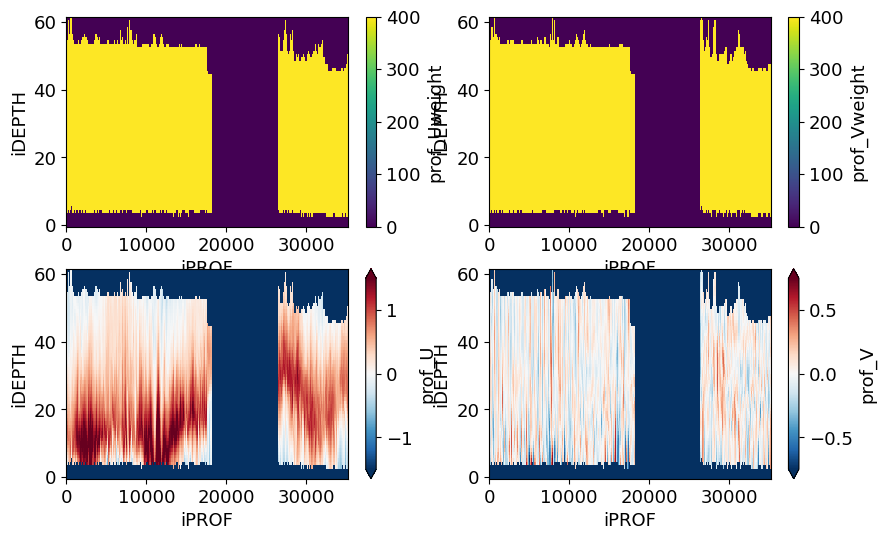

In [41]:
fig,ax = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)

ds_adcp.prof_Uweight.T.plot(ax=ax[0,0])
ds_adcp.prof_U.T.plot(ax=ax[1,0],vmin=-1.5,vmax=1.5,cmap='RdBu_r')

ds_adcp.prof_Vweight.T.plot(ax=ax[0,1])
ds_adcp.prof_V.T.plot(ax=ax[1,1],vmin=-0.75,vmax=0.75,cmap='RdBu_r')

In [15]:
ds_adcp.prof_Uweight

<xarray.DataArray 'prof_Uweight' (iPROF: 35228, iDEPTH: 62)> Size: 17MB
array([[400., 400., 400., ..., 400., 400., 400.],
       [400., 400., 400., ..., 400., 400., 400.],
       [400., 400., 400., ..., 400., 400., 400.],
       ...,
       [400., 400., 400., ..., 400., 400., 400.],
       [400., 400., 400., ..., 400., 400., 400.],
       [400., 400., 400., ..., 400., 400., 400.]])
Dimensions without coordinates: iPROF, iDEPTH

In [42]:
profile_path = '/data/SO3/edavenport/tpose6/tao_profiles/TAO_WO_2012_ADCP.nc'
ds_adcp.to_netcdf(profile_path, mode='w', engine='netcdf4')
profile_path = '/data/SO3/edavenport/tpose6/tao_profiles/TAO_WO_2012_CUR.nc'
ds_cur.to_netcdf(profile_path, mode='w', engine='netcdf4')

In [43]:
client.shutdown()

2025-08-19 20:01:44,908 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/distributed/worker.py", line 1250, in heartbeat
    response = await retry_operation(
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/distributed/utils_comm.py", line 461, in retry_operation
    return await retry(
           ^^^^^^^^^^^^
  File "/home/edavenport/minicond